In this Jupyter Notebook , I will try out 3 different regression techniques and check which of them performs better.The Algorithms i will be using are: Linear Regression, Lasso Regression and RandomForestRegressor.

Basically, i'm just going to do data analysis and preprocess before i use the algorithms themselves so ironically
i'm more accurate.
So here it goes.

In [33]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [78]:
df=pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [35]:
# learn to explore data.
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [36]:
#check for null values
df.isnull().sum()
# no null values now we can move on to the next step

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [37]:
df['charges'].describe()
# remember that the mean is 13K

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

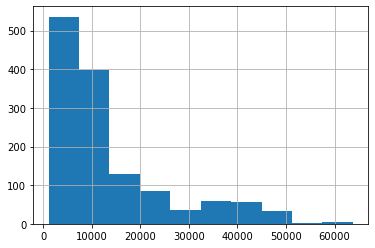

In [38]:
df_hist=df['charges'].hist()

In [39]:
total_exp=df['charges']
total_exp

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [40]:
total_exp_30k=df['charges'][df['charges']>30000]
total_exp_30k

14      39611.75770
19      36837.46700
23      37701.87680
29      38711.00000
30      35585.57600
           ...     
1301    46718.16325
1303    37829.72420
1308    33900.65300
1313    36397.57600
1323    43896.37630
Name: charges, Length: 162, dtype: float64

In [41]:
total_exp_40k=df['charges'][df['charges']>40000]
total_exp_40k

34      51194.55914
39      48173.36100
55      47496.49445
86      43578.93940
94      47291.05500
           ...     
1241    49577.66240
1284    47403.88000
1300    62592.87309
1301    46718.16325
1323    43896.37630
Name: charges, Length: 79, dtype: float64

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1259, dtype: float64


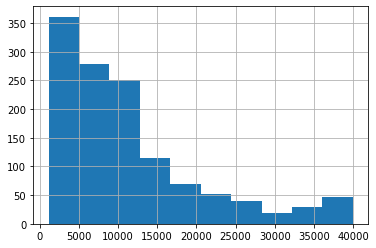

In [42]:
total_exp_39k=df['charges'][df['charges']<40000]
print(total_exp_39k)
df_hist=df['charges'][df['charges']<40000].hist()

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1176, dtype: float64


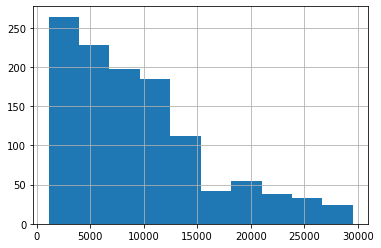

In [23]:
total_exp_29k=df['charges'][df['charges']<=30000]
print(total_exp_29k)
df_hist=df['charges'][df['charges']<=30000].hist()

In [79]:
df_30k=df[df['charges']<30000]
#df.head()
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [62]:
df['charges'].describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

In [63]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

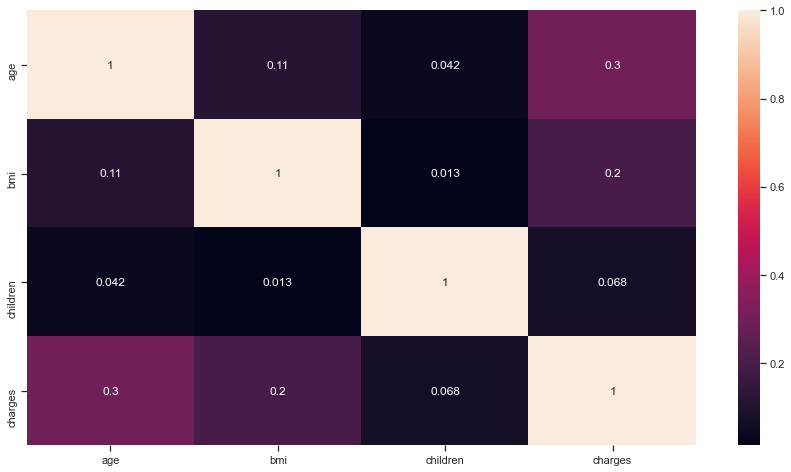

In [68]:
import seaborn as sns
sns.set(style="ticks", color_codes=True)
corr = df.corr(method='pearson')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
df.columns

# indipendece of the features
df.dtypes

In [80]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [85]:
#standardize features
#from sklearn.preprocessing import StandardScaler
#scaler=StandardScaler()
#x_std=scaler.fit_transform(x)

x_std=pd.get_dummies(df,columns=['sex','smoker','region'],drop_first=True)
x_std
df_new=x_std[['age','bmi','children','sex_male','smoker_yes','region_northwest','region_southeast','region_southwest','charges']]
df_new

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,charges
0,19,27.900,0,0,1,0,0,1,16884.92400
1,18,33.770,1,1,0,0,1,0,1725.55230
2,28,33.000,3,1,0,0,1,0,4449.46200
3,33,22.705,0,1,0,1,0,0,21984.47061
4,32,28.880,0,1,0,1,0,0,3866.85520
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,1,0,1,0,0,10600.54830
1334,18,31.920,0,0,0,0,0,0,2205.98080
1335,18,36.850,0,0,0,0,1,0,1629.83350
1336,21,25.800,0,0,0,0,0,1,2007.94500


split into features and target variables.

In [86]:
x=df_new.iloc[:,:-1].values
x

array([[19.  , 27.9 ,  0.  , ...,  0.  ,  0.  ,  1.  ],
       [18.  , 33.77,  1.  , ...,  0.  ,  1.  ,  0.  ],
       [28.  , 33.  ,  3.  , ...,  0.  ,  1.  ,  0.  ],
       ...,
       [18.  , 36.85,  0.  , ...,  0.  ,  1.  ,  0.  ],
       [21.  , 25.8 ,  0.  , ...,  0.  ,  0.  ,  1.  ],
       [61.  , 29.07,  0.  , ...,  1.  ,  0.  ,  0.  ]])

In [87]:
y=df_new.iloc[:,-1].values
y

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

In [91]:
# do the split 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [92]:
x_train

array([[46.   , 19.95 ,  2.   , ...,  1.   ,  0.   ,  0.   ],
       [47.   , 24.32 ,  0.   , ...,  0.   ,  0.   ,  0.   ],
       [52.   , 24.86 ,  0.   , ...,  0.   ,  1.   ,  0.   ],
       ...,
       [58.   , 25.175,  0.   , ...,  0.   ,  0.   ,  0.   ],
       [37.   , 47.6  ,  2.   , ...,  0.   ,  0.   ,  1.   ],
       [55.   , 29.9  ,  0.   , ...,  0.   ,  0.   ,  1.   ]])

In [94]:
from sklearn.linear_model import LinearRegression
simp_reg=LinearRegression()
simp_reg.fit(x_train,y_train)

LinearRegression()

In [95]:
y_predict=simp_reg.predict(x_test)

In [104]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_predict)
print(score)

0.7835929767120722


In [106]:
from sklearn.linear_model import Lasso
regL1 = Lasso(alpha=0.01)
regL1.fit(x_train, y_train)

Lasso(alpha=0.01)

In [108]:
y_pred_lasso=regL1.predict(x_test)
score_lasso=r2_score(y_test,y_pred_lasso)
print(score_lasso)

0.7835924268063132


Trying out Random Forest Regressor

In [110]:
from sklearn.ensemble import RandomForestRegressor
reg_RFR = RandomForestRegressor(n_estimators=300)
reg_RFR.fit(x_train, y_train)
y_pred_RFR=reg_RFR.predict(x_test)
score_RFR=r2_score(y_test,y_pred_RFR)
print(score_RFR)

0.8644515297424435


Athough i Didnt plot all these 3 values, it is clear that randomforestregressor 
has the best performance R2 Socre.
So in the future , if i am predicting this is a reminder to start with randomforest regressor.

                      END(For now) 
If in the future if you feel any other algorithms are good enough make sure you add them below just as a note